In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Información de datos: 
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
df = pd.read_csv("heart.csv")
df.head(10)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   
9   57    1   2     150   168    0        1       174     0      1.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
5    0      1       1  
6    0      2       1  
7    0      3       1  
8    0      3       1  
9    0      2       1

# 1. Análisis Exploratorio de datos (EDA)

### Inspección de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# for i in range(df.shape[1]):
#     print(f'Número de valores únicos para la columna de {df.columns[i]}:')
#     print(df.iloc[:,i].value_counts())
#     print("\n")

### Explorando la división entre la clasificación de datos

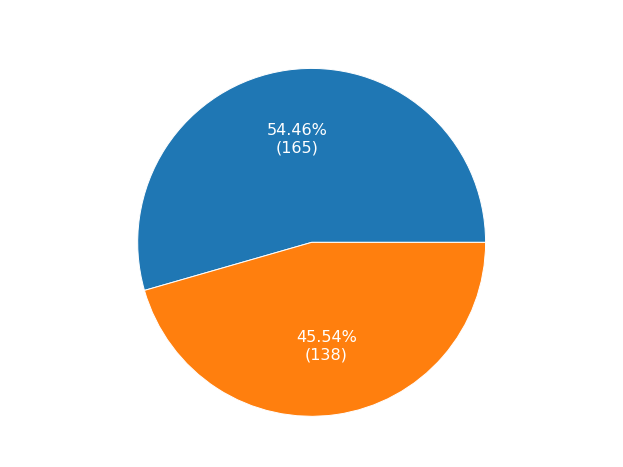

In [5]:
output = [1,0]
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, df.iloc[:,6].value_counts().sum()*x/100)

plt.figure(figsize = (11,8))
plt.pie(df.iloc[:,-1].value_counts(), labels=output, textprops={'color':"w", 'fontsize': 16}, labeldistance=1.1,
        wedgeprops = {"linewidth": 1, "edgecolor": "white"},autopct=my_fmt)
plt.title("Output (0= less chance of heart attack 1= more chance of heart attack)", fontsize=15, color= 'white', fontweight='bold')
plt.show()

### Exploración de variables

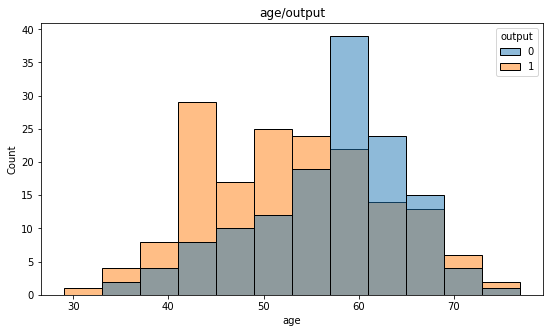

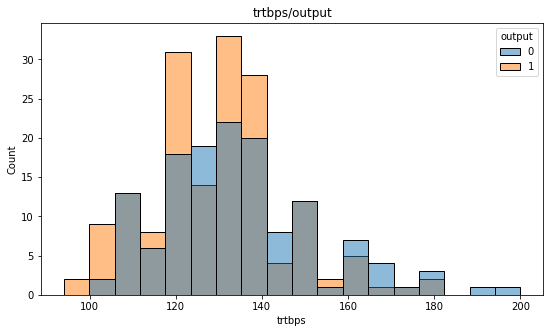

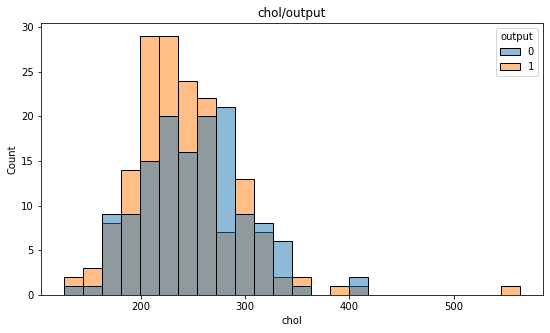

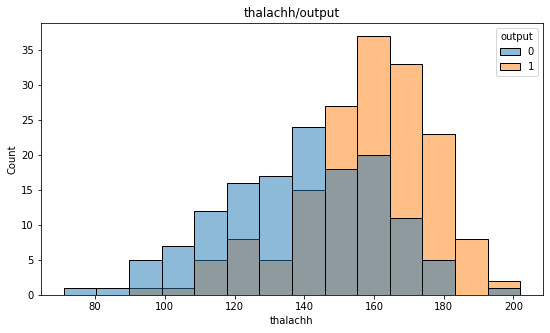

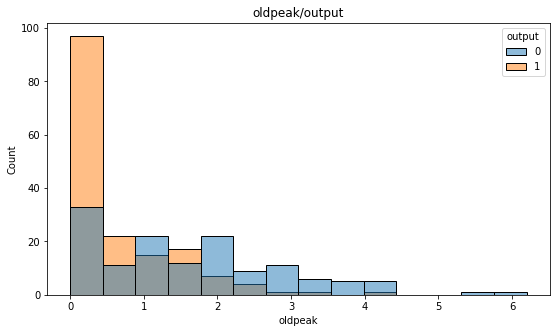

In [6]:
cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
for i in range(len(cols)):
    plt.figure(figsize = (9,5))
    sns.histplot(x = cols[i], hue = "output",data = df)
    plt.title(f'{cols[i]}/output')
    plt.show()

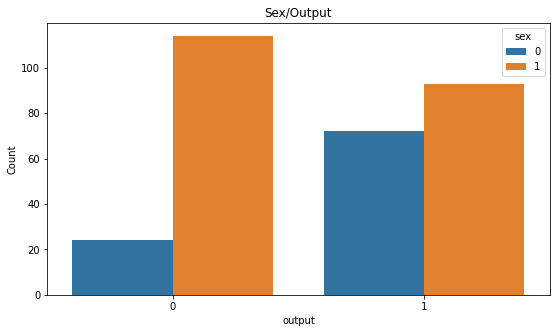

In [9]:
# Gráfica de la relación entre el sexo y el resultado
df_BP = df.groupby(["output","sex"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "sex",data = df_BP)
plt.title("Sex/Output")
plt.show()

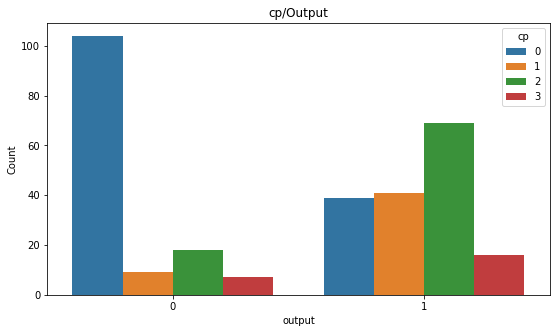

In [10]:
# Gráfica de la relación entre el cp y el resultado
df_BP = df.groupby(["output","cp"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "cp",data = df_BP)
plt.title("cp/Output")
plt.show()

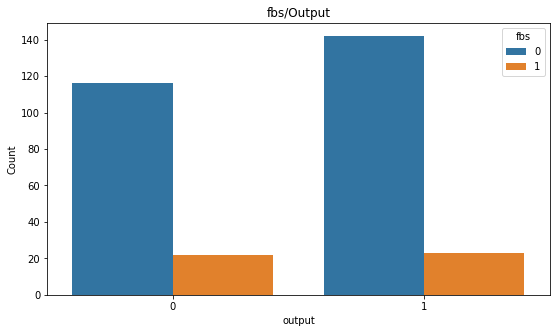

In [11]:
# Gráfica de la relación entre fbs y el resultado
df_BP = df.groupby(["output","fbs"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "fbs",data = df_BP)
plt.title("fbs/Output")
plt.show()

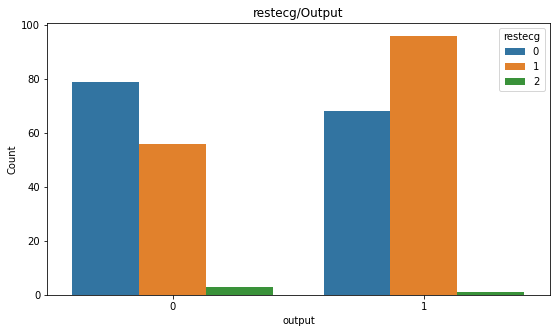

In [12]:
# Gráfica de la relación entre el restecg y el resultado
df_BP = df.groupby(["output","restecg"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "restecg",data = df_BP)
plt.title("restecg/Output")
plt.show()

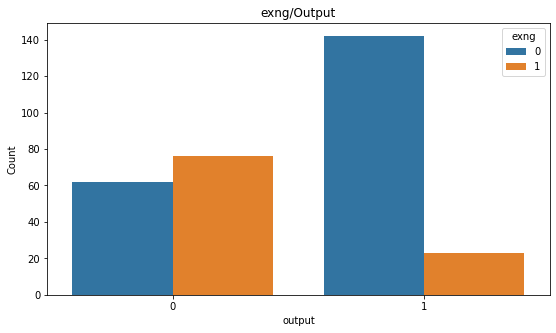

In [13]:
# Gráfica de la relación entre exng y el resultado
df_BP = df.groupby(["output","exng"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "exng",data = df_BP)
plt.title("exng/Output")
plt.show()

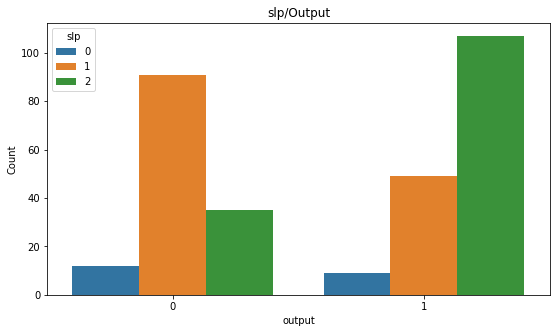

In [14]:
# Gráfica de la relación entre slp y el resultado
df_BP = df.groupby(["output","slp"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "slp",data = df_BP)
plt.title("slp/Output")
plt.show()

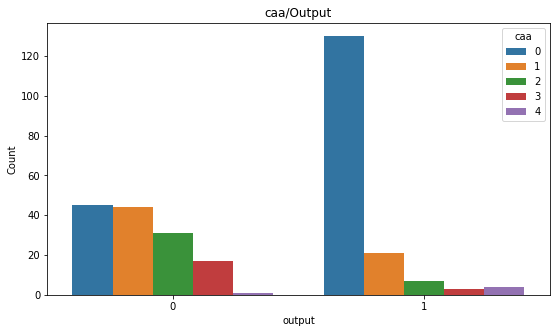

In [15]:
# Gráfica de la relación entre caa y el resultado
df_BP = df.groupby(["output","caa"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "caa",data = df_BP)
plt.title("caa/Output")
plt.show()

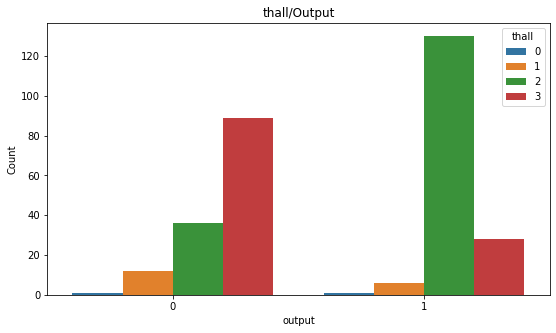

In [16]:
# Gráfica de la relación entre thall y el resultado
df_BP = df.groupby(["output","thall"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "output",y="Count", hue = "thall",data = df_BP)
plt.title("thall/Output")
plt.show()

### Obervaciones de la EDA:
- El set de datos no presenta anomalías en los datos además de estar muy balanceados los datos, teniendo casi la misma cantidad de datos para personas con riesgos a un infarto y personas con bajo riesgo.
- Respecto a la exploración de variables, las variables continiuas ("age", "trtbps", "chol", "thalachh", "oldpeak") no presentan una distinción notable para personas con un riesgo alto de un infarto y personas con bajo riesgo; ambas distribuciones en las gráficas se traslapan.
- Respecto al tipo de dolor de pecho, aquellos con angina de pecho típicas (typical angina), cp = 0, tienenden a tener menos probablidades de infarto.
- Aquellas personas que no tienen exercise induced angina, podría ser un factor para tener probabilidades altas de infarto
- Respecto al número de vasos del corazón (major vessels), aquellas personas con 0 vasos (caa = 0) tienden a tener más probabilidades de tener un infarto.
- Personas con thall = 2 tienden a tener más probabilidades altas de un infarto.

# 2. Creación de modelo de Machine Learning para clasificación del riesgo de un ataque cardiaco

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

### Caso 1: Creación de modelo con datos desbalanceados
### Dividiendo datos

In [18]:
# Divieindo set de datos
X, y = df.iloc[:,:-1], df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Hay una
y_train.value_counts() # Datos desbalanceados

1    130
0    112
Name: output, dtype: int64

### Algoritmo: Naive Bayes

In [19]:
# Creando y entrenando modelo
nb = GaussianNB()
nb.fit(X_train, y_train)

# Testing
y_pred = nb.predict(X_test)

# Evaluando
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred):.2f}')
print("Confussion matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87
F1 score: 0.88
Confussion matrix: 
[[23  3]
 [ 5 30]]


### Algoritmo: K-Nearest Neighbor

In [20]:
# Creando y entrenando modelo
knn = KNeighborsClassifier(n_neighbors=int(np.sqrt(df.shape[0])))
knn.fit(X_train, y_train)

# Testing
y_pred = knn.predict(X_test)

# Evaluando
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred):.2f}')
print("Confussion matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.62
F1 score: 0.67
Confussion matrix: 
[[15 11]
 [12 23]]


### Algoritmo: Support Vector Machine

In [21]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Testing
y_pred = svm.predict(X_test)

# Evaluando
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred):.2f}')
print("Confussion matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89
F1 score: 0.90
Confussion matrix: 
[[21  5]
 [ 2 33]]


### Caso 2: Creación de modelo con datos balanceados

In [22]:
from imblearn.over_sampling import RandomOverSampler, ADASYN

In [23]:
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)
y_resampled.value_counts()

1    130
0    130
Name: output, dtype: int64

### Algoritmo: Naive Bayes

In [24]:
# Creando y entrenando modelo
nb = GaussianNB()
nb.fit(X_resampled, y_resampled)

# Testing
y_pred = nb.predict(X_test)

# Evaluando
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred):.2f}')
print("Confussion matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87
F1 score: 0.88
Confussion matrix: 
[[23  3]
 [ 5 30]]


### Algoritmo: K-Nearest Neighbor

In [25]:
# Creando y entrenando modelo
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_resampled, y_resampled)

# Testing
y_pred = knn.predict(X_test)

# Evaluando
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred):.2f}')
print("Confussion matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.66
F1 score: 0.69
Confussion matrix: 
[[17  9]
 [12 23]]


### Algoritmo: Support Vector Machine

In [26]:
svm = SVC(kernel="linear")
svm.fit(X_resampled, y_resampled)

# Testing
y_pred = svm.predict(X_test)

# Evaluando
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 score: {f1_score(y_test, y_pred):.2f}')
print("Confussion matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90
F1 score: 0.92
Confussion matrix: 
[[22  4]
 [ 2 33]]


In [27]:
# from sklearn.model_selection import cross_val_score
# n_feats = X.shape[1]

# print('Feature  Accuracy')
# for i in range(n_feats):
#     a = X.iloc[:, i].to_numpy().reshape(-1, 1)
#     scores = cross_val_score(svm, a, y, cv=3)
#     print(f'{i}        {scores.mean():g}')
    